<a href="https://colab.research.google.com/github/rabih96/Colab/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMP-5361: Discrete Structures and Formal Languages Programming Assignment 2

---
---

###1-Introduction
___

In this assignment we will use the FrozenLake-v0 environment to explore our knowledge of functions! The environment and its backstory are presented below:

```
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you’ll fall into the freezing water. At this time, there’s an international frisbee shortage, so it’s absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won’t always move in the direction you intend.The episode ends when you reach the goal or fall in a hole.
```

We will use matplotlib for the plots and numpy for other small details.

###2-Manual Inspection
___
In this section we are going to implement a fixed set of actions that are required to reach the goal. The path for the following map could be one of many, but we are only using one of the shortest possible:

``` 
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

Shortest path used: ```1,1,2,1,2,2```

Where:
```
  LEFT = 0
  DOWN = 1
  RIGHT = 2
  UP = 3
```

####2.1-Importing our Libraries
___
First we need to install ```gym``` in our environment and import it, along with ```numpy``` and ```matplotlib```. 

Gym is a toolkit for developing and comparing reinforcement learning algorithms by creating environments and an agent to manupulate in the environment.

As for numpy and matplotlib, they are going to be used to plot the results of each section.

In [41]:
!pip install gym

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import gym

####2.2-Graph Function
___
After we have imported the required libraries, we now need to create a function that displays the bar graph which is going to be used in upcoming sections.

This function takes in the values that are going to be plotted, along with the title for it. 

In [0]:
def drawBarGraph(values, title):
  
  fig, ax = plt.subplots()
  ind = np.arange(0, 2)
  
  #setup legends 
  red_patch = mpatches.Patch(color='red', label='Sucess %')
  blue_patch = mpatches.Patch(color='blue', label='Failure %')
  plt.legend(handles=[red_patch,blue_patch])

  #setup graph bars
  success, failure = plt.bar(ind, [0,0])
  ax.set_xticks(ind)
  ax.set_xticklabels(['Success', 'Failure'])
  ax.set_ylim([0, 100])
  ax.set_ylabel('Percent')
  ax.set_xlabel('Success/Failure Percentage')
  ax.set_title(title)

  #set bars color and height
  success.set_facecolor('r')
  failure.set_facecolor('b')
  success.set_height(values[0])
  failure.set_height(values[1])

  #add % values text to each bar for better presentation
  for i, v in enumerate(values):
    ax.text(i, v/values[i], values[i])

  plt.show()

####2.3-Environment 
___
Now we need to setup our environment which we are going to input our path. This environment will loop 1000 times to report the percentage of the times we successfully ended up with the frisbee and the times we failed, using the manual inspection method.

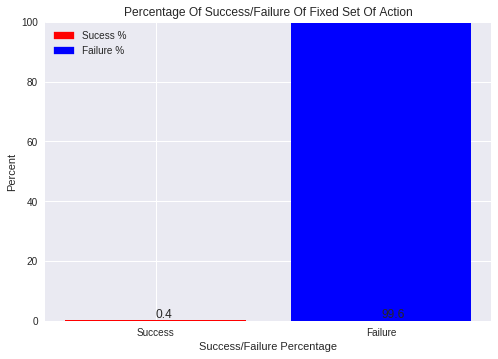

In [43]:
#environment init
env = gym.make('FrozenLake-v0')

#the fixed steps as described above
action_steps = [1,1,2,1,2,2]

#number of episodes to loop
episodes = range(1000)

#this number increaments each time we get to the goal we want
success = 0

#loop through the episodes
for episode in episodes:
  
  #bool used to check whether the episode fell into a hole
  terminated = False
  
  #reset our environment to try again from start
  state = env.reset()
  
  #monitor the index of the action_steps list
  step = 0

  #check whether we failed or not
  while not terminated:

    #action should be a number from 0 to 3 to give direction as described above
    action = action_steps[step]
    
    #increment the index
    step += 1

    #apply the action taken from the array and get the response of what happened
    next_state, reward, terminated, info = env.step(action)
  
    #update the state for the upcoming try 
    state = next_state
    
    #check whether we reached the end of our action set to terminate the loop as a fail
    if step == len(action_steps):
      terminated = True

    # if its terminated and the reward is 1 (success) then increment the number of success by 1
    if terminated and reward == 1.0:
      success += 1

#calculate the percentage of success/failrues
success_rate = success / 10
failure_rate = 100-success_rate
values = [success_rate, failure_rate]

#display the results above in form of a graph along the respective title
drawBarGraph(values, 'Percentage Of Success/Failure Of Fixed Set Of Action')

###3-Define a Function
___

In this part we aim to replace the fixed list of actions with a dynamic function. We are going to define a simple function that would tell you the action we need to take based on our position.
```
f(position) = best action ∀position ∈ Grid
```


####3.1-Defining f(position) 
___

This function will be a surjective one, having a direction return as integer for any position parsed to the function. The function will recieve the position from the curent state and accordingly it will return the direction that we should move to.

We will initialize three lists, each one dedicated for each direction with the elements being the position we are in. So each list will have the elements we are going to return the respective direction.

In [0]:
def f(position):
  
  #the lists holding the positions respectively to return the directions required.
  LEFT = [3]
  DOWN = [0,2,4,6,9,10]
  RIGHT = [1,8,13,14]
  
  #detect the parsed position is in which list to return the integer representing the direction.
  if position in LEFT:
    return 0
  elif position in DOWN:
    return 1
  elif position in RIGHT:
    return 2

####3.2-Environment
----
After the function f(position) has been defined we are going to setup our environment once again with few modification to be able to correlate with the return values from the defined function. 

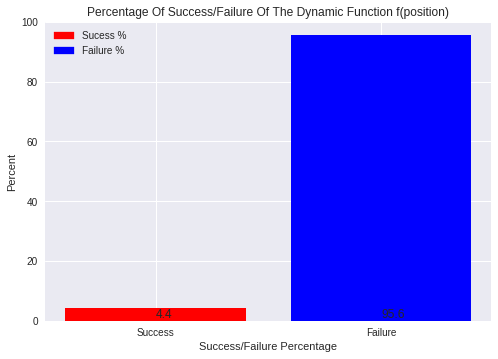

In [45]:
#initialize the environment
env = gym.make('FrozenLake-v0')

#initialize the variables
episodes = range(1000)
success = 0

#loop the episodes
for episode in episodes:

  terminated = False
  state = env.reset()

  while not terminated:
    
    #using f(posiiton) to determine the action that should be done
    action = f(state)
    
    #apply the action and retrive the outcome
    next_state, reward, terminated, info = env.step(action)

    state = next_state
    
    #add the success to plot after the episodes are done
    if terminated and reward == 1.0:
      success += 1

success_rate = success / 10
failure_rate = 100-success_rate
values = [success_rate, failure_rate]

#draw the graph
drawBarGraph(values, 'Percentage Of Success/Failure Of The Dynamic Function f(position)')

####3.3-Conclusion & Comparision
----
As we can see, the percentsge of success using the dynamic function f(position) outweighed the manual inspection method by a long run. The increase is about up to 130% in success rate, proving a dynamic function is way more effective since it provides a new direction on each step based on our position.

###4-Extended List
____
In this part we going to define a function called h(position) which is similar to the manual inspection method, but this function will return a new set of actions depending on our current location. The function will be as follows:


```
h(position) = one minimal list of actions to the frisbee ∀position ∈ Grid
```



####4.1-Defining h(position)
____
This function will recieive the current position in the environment and based on its state it will return a small set of actions to try and see if it reaches the goal. The position will only be one of the "slippery" positions, since "holes" present that we have failed the current episode. The slippery positions are ```0,1,2,3,4,6,8,9,10,13,14```, for each position we will return a small list that represent the shortest path which are going to be executed in hopes to reach our goal.

In [0]:
def h(position):
  if position == 0:
    return [1,1,2,1,2,2]
  elif position == 1:
    return [2,1,1,1,2]
  elif position == 2:
    return [1,1,1,2]
  elif position == 3:
    return [0,1,1,1,2]
  elif position == 4:
    return [1,2,1,2,2]
  elif position == 6:
    return [1,1,2]
  elif position == 8:
    return [2,1,2,2]
  elif position == 9:
    return [1,2,2]
  elif position == 10:
    return [1,2]
  elif position == 13:
    return [2,2]
  elif position == 14:
    return [2]

####4.2-Environment
____
After the function h(position) has been defined we are going to setup our environment once again with few modification to be able to correlate with the return values from the defined function. 

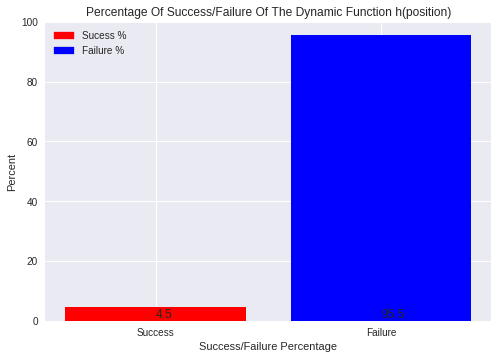

In [47]:
env = gym.make('FrozenLake-v0')

action_steps = list(h(0))
episodes = range(1000)
success = 0

for episode in episodes:

  terminated = False
  state = env.reset()
  step = 0

  while not terminated:

    action = action_steps[step]
    
    step += 1

    next_state, reward, terminated, info = env.step(action)

    state = next_state
    
    if step == len(action_steps) and not terminated:
      action_steps = list(h(state))
      step = 0

    if terminated and reward == 1.0:
      success += 1

success_rate = success / 10
failure_rate = 100-success_rate
values = [success_rate, failure_rate]

drawBarGraph(values, 'Percentage Of Success/Failure Of The Dynamic Function h(position)')

####4.3-Conclusion & Comparision
____
After many successful execution we can conclude that the dynamic function f(position) got a better success rate than h(position).

###5-Piecewise Function
____

In this part we will try to define another function for navigation in this environment that takes advantage of previous approaches. We will define a Piecewise function k as follows:


```
k(position, α) = h(position) with probability 1 − α
               = f(position) with probability α 
```




####5.1-Defining k(position, α)
____
This function is based on probability factor α, which is going to be deduced using the random library. A random integer number will be picked between 0 and 100 and then compared to α (which will be multiplied by 100). Based on the reults we will either go with f(position) or h(position).

In [0]:
import random

def k(position, α):
  if random.randint(0,100) <= α*100:
    return f(position)
  else:
    return h(position)

####5.2-Environment
____
After the function k(position, α) has been defined we are going to setup our environment once again with few modification to be able to correlate with the return values from the defined function. 

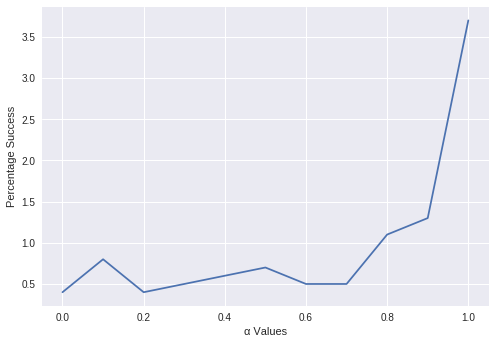

In [49]:
env = gym.make('FrozenLake-v0')

#get list with all values of α that we going to iterate from 0.0 to 1.0 with 0.1 increament including 1.0 
alpha_values = np.arange(0, 1.1, 0.1)

#initialize list of 11 elements to store the % of success for each alpha value
success_values = [None] * 11

#iterrate for each alpha value, whilke having the index to know in which position we are according to alpha
for index, alpha in enumerate(alpha_values, start=0):

  episodes = range(1000)
  success = 0

  for episode in episodes:

    terminated = False
    state = env.reset()

    while not terminated:
      
      action_probablity = k(state, alpha)
      
      #check if we need to go with h(position)
      if isinstance(action_probablity, list):
        
        step = 0
        
        while not terminated:

          action = action_probablity[step]

          step += 1

          next_state, reward, terminated, info = env.step(action)

          state = next_state

          if step == len(action_probablity):
            terminated = True

          if terminated and reward == 1.0:
            success += 1
      
      #since its not a list means we are going to perform an action based on f(position)
      else:

        next_state, reward, terminated, info = env.step(action_probablity)

        state = next_state

        if terminated and reward == 1.0:
          success += 1
  
  #add the success value for the respective value of alpha in its proper position 
  success_values[index] = success*100/len(episodes)

#plot the graph showcasing the success percentage for each value of alpha
plt.plot(alpha_values, success_values)
plt.ylabel('Percentage Success')
plt.xlabel('α Values')
plt.show()

####5.3-Conclusion & Comparision
____
As we can see the success percentage is steady at first until it reaches the α values between 0.6-0.8, from then the percentage success increases significantly to reach almost 5x the success rate. This implies that the combination of both functions isnt that fruiting, but f(position) is the best dynamic function with highest percentage of success. Since for α = 1, k(position, α) is basically only calling f(position).